# Weather Prediction Using Perceptron

###  Perceptron model to predict whether it will rain tomorrow using the Australian Rain Dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
data = pd.read_csv("weatherAUS.csv")


In [6]:
features = ["Humidity3pm", "Pressure3pm", "WindSpeed3pm", "MaxTemp", "MinTemp"]
target = "RainTomorrow"

In [7]:
data = data[features + [target]].dropna()

In [8]:
data[target] = LabelEncoder().fit_transform(data[target])

In [12]:
X = data[features].values
y = data[target].values
print(X)
print(y)

[[  22.  1007.1   24.    22.9   13.4]
 [  25.  1007.8   22.    25.1    7.4]
 [  30.  1008.7   26.    25.7   12.9]
 ...
 [  21.  1019.1    9.    25.3    3.6]
 [  24.  1016.8    9.    26.9    5.4]
 [  24.  1016.5    7.    27.     7.8]]
[0 0 0 ... 0 0 0]


In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

Perceptron(random_state=42)

In [16]:
y_pred = model.predict(X_test)


In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f" Perceptron Model Accuracy: {accuracy:.2f}")

 Perceptron Model Accuracy: 0.80


In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

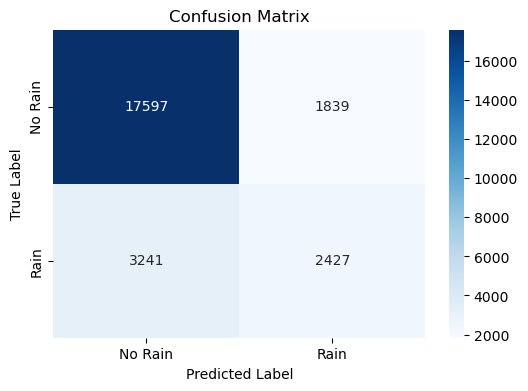

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [27]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     19436
           1       0.57      0.43      0.49      5668

    accuracy                           0.80     25104
   macro avg       0.71      0.67      0.68     25104
weighted avg       0.78      0.80      0.79     25104



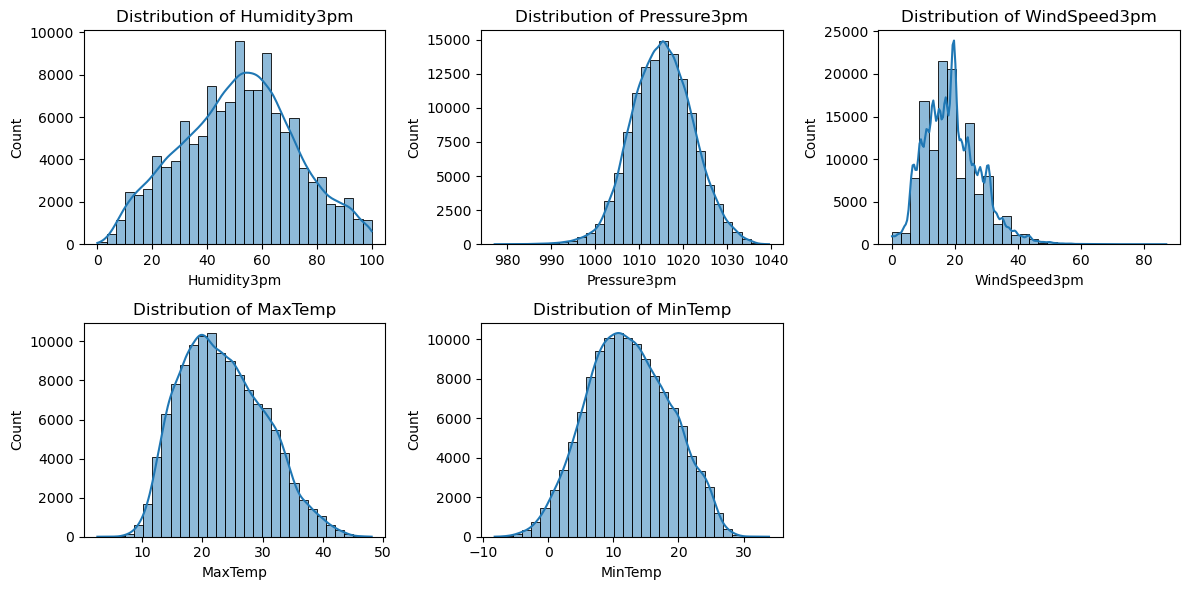

In [26]:
plt.figure(figsize=(12,6))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()